In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import variation 
import scipy.stats
from statistics import variance
import statistics as stat
import math

In [2]:
##############################################Wholesale Customers Analysis###################################################

In [3]:
#CA indicating Customer Analysis
WholeSale_CA = pd.read_csv("C:/Users/Vidhut Sharma/Documents/PRojectsGivenByGL/Wholesale+Customers+Data.csv")
WholeSale_CA

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [4]:
#1.1
#Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?


In [5]:
print("The descriptive statistics for the data is as follows : ")
WholeSale_CA.describe()

The descriptive statistics for the data is as follows : 


,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


The maximum Spends in the Channel is by 'Hotel'and the maximum Spends in Region is by 'Other'
The minimum Spends in the Channel is by 'Retail'and the minimum Spends in Region is by 'Oporto'


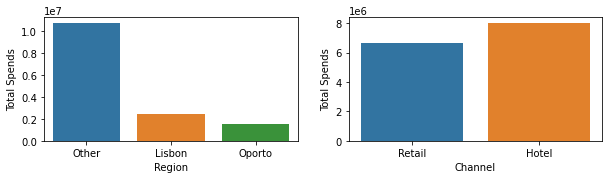

In [6]:
Channel = WholeSale_CA["Channel"].unique()
Region = WholeSale_CA["Region"].unique()
C = {"Channel" : Channel}
R = {"Region" : Region}
TotalForChannel = pd.DataFrame(C)
TotalForRegion = pd.DataFrame(R)
Summation_C = list()
Summation_R = list()
#########For Channel ##########################
for i in range(0 , len(Channel)):
    Sum = WholeSale_CA[WholeSale_CA["Channel"] == Channel[i]].sum(axis = 0)
    Summation_C.append(sum(Sum[3:len(Sum)]))

TotalForChannel["Total Spends"] = Summation_C

###############################For Region##################################################
for i in range(0 , len(Region)):
    Sum = WholeSale_CA[WholeSale_CA["Region"] == Region[i]].sum(axis = 0)
    Summation_R.append(sum(Sum[3:len(Sum)]))

TotalForRegion["Total Spends"] = Summation_R

######### The answer regarding the Maximum and minimum by channel and region[C indicates Channel and R indicates Region]######
Max_C = list(TotalForChannel[TotalForChannel["Total Spends"] == max(TotalForChannel["Total Spends"])]["Channel"])
Max_R = list(TotalForRegion[TotalForRegion["Total Spends"] == max(TotalForRegion["Total Spends"])]["Region"])

Min_C = list(TotalForChannel[TotalForChannel["Total Spends"] == min(TotalForChannel["Total Spends"])]["Channel"])
Min_R = list(TotalForRegion[TotalForRegion["Total Spends"] == min(TotalForRegion["Total Spends"])]["Region"])

print("The maximum Spends in the Channel is by "  +" ".join( repr(e) for e in Max_C) + "and the maximum Spends in Region is by " +
     " ".join( repr(e) for e in Max_R))

print("The minimum Spends in the Channel is by "  +" ".join( repr(e) for e in Min_C) + "and the minimum Spends in Region is by " +
     " ".join( repr(e) for e in Min_R))

fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
plt.subplot(2,2,1)
sns.barplot(x = "Region" , y = "Total Spends" , data=TotalForRegion);
plt.subplot(2,2,2)
sns.barplot(x = "Channel" , y = "Total Spends" , data=TotalForChannel);

In [7]:
#1.2 
#There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

Region = WholeSale_CA.drop(["Channel"], axis =1)
Region.describe()


,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
Channel = WholeSale_CA.drop(["Region"] , axis = 1)
Channel.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


The maximum inconsistency in the price is by 'Detergents_Paper'and the least inconsistency in the price is by 'Fresh'
The following graph can explain in a better way : 


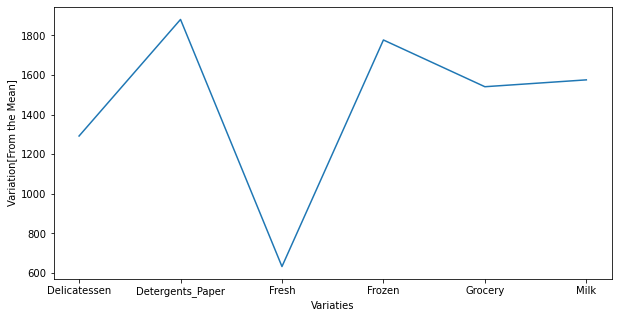

In [9]:
#1.3
#On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?\
###In this case for inconsistency Will be using the IQR################################
WholeSale_CA_New = WholeSale_CA.drop(["Buyer/Spender"],axis = 1) 

Varieties = list(WholeSale_CA_New.describe())

Measure = {"Variaties" :Varieties , "Standard Deviation" : list(np.std(WholeSale_CA_New))}

DescriptiveMeasure = pd.DataFrame(Measure)
##########In this subtratcting the Standard Deviation From Mean to check the variation of each variaties from the mean#########
DescriptiveMeasure["Variation[From the Mean]"] = list(np.std(WholeSale_CA_New) - WholeSale_CA_New.describe().iloc[1])
DescriptiveMeasure

Most_Incon = list(DescriptiveMeasure[DescriptiveMeasure["Variation[From the Mean]"] == max(DescriptiveMeasure["Variation[From the Mean]"])]["Variaties"])

Least_incon = list(DescriptiveMeasure[DescriptiveMeasure["Variation[From the Mean]"] == min(DescriptiveMeasure["Variation[From the Mean]"])]["Variaties"])

print("The maximum inconsistency in the price is by " + " ".join( repr(e) for e in Most_Incon) + "and the least inconsistency in the price is by " + " ".join( repr(e) for e in Least_incon))
print("The following graph can explain in a better way : ")
##########As we are asked regarding the variability of data we might prefer Standard Deviation ####################
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = "Variaties" , y = "Variation[From the Mean]" , data= DescriptiveMeasure,ax = ax);

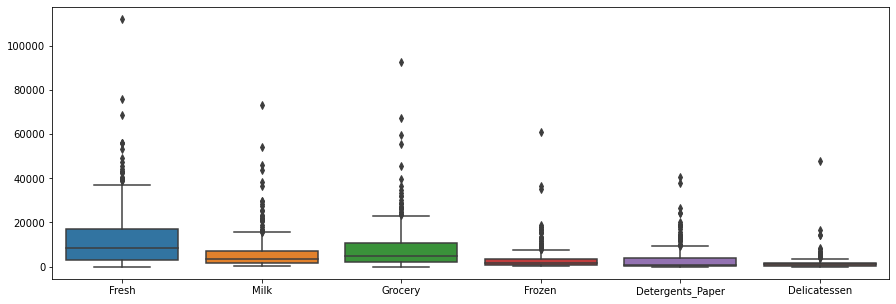

In [10]:
#1.4
#Are there any outliers in the data?
fig_dims = (15,5)
fig, ax = plt.subplots(figsize=fig_dims)

###To check the outliers the best way is by using the box plots###############
sns.boxplot(data = WholeSale_CA_New,ax = ax);

In [11]:
##########################################################Survey############################################################
#Reading the file 

Survey = pd.read_csv("C:/Users/Vidhut Sharma/Documents/PRojectsGivenByGL/Survey.csv")
Survey

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [12]:
#2.1.1Gender and Major
pd.crosstab(index = Survey["Gender"] , columns=Survey["Major"])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [13]:
#2.1.2 Gender and Grad Intention
pd.crosstab(index = Survey["Gender"] , columns=Survey["Grad Intention"])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [14]:
#2.1.3 Gender and Employment
pd.crosstab(index = Survey["Gender"] , columns=Survey["Employment"])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [15]:
#2.1.4 Gender and Computer
pd.crosstab(index = Survey["Gender"] , columns=Survey["Computer"])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [16]:
#2.2.1 What is the probability that a randomly selected CMSU student will be male?
###################################and#############################################
#2.2.2 What is the probability that a randomly selected CMSU student will be female?
Male = Survey["Gender"].value_counts()["Male"]
Female = Survey["Gender"].value_counts()["Female"]
Total = Survey["Gender"].value_counts().sum()

print("The probability that randomly selected CMSU student will be male is " + str(round(Male / Total , 3)))
print("The probability that randomly selected CMSU student will be female is " + str(round(Female / Total , 3)))

The probability that randomly selected CMSU student will be male is 0.468
The probability that randomly selected CMSU student will be female is 0.532


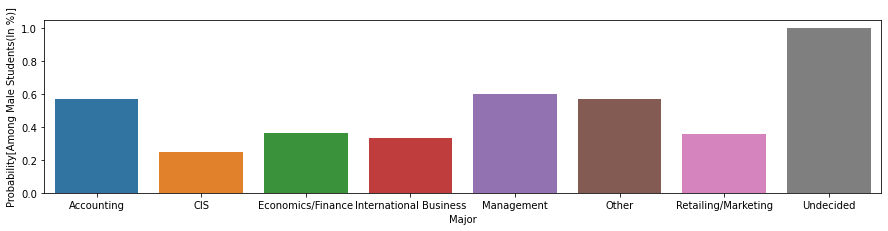

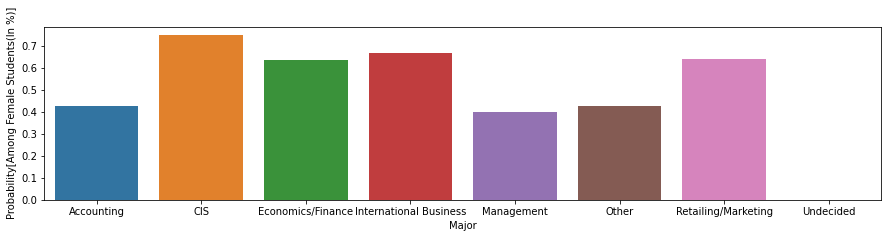

In [17]:
#2.3.1 Find the conditional probability of different majors among the male students in CMSU.
Major  = pd.crosstab(index = Survey["Gender"], columns=Survey["Major"])
#Formula for calculating conditional probability is : Major | Male = P(Major ∩ Male)/P(Male + Female)
#2.3.2 Find the conditional probability of different majors among the female students of CMSU.
#Formula for calculating conditional probability is : Major | Male = P(Major ∩ Female)/P(Male + Female)
Male_Percent = list()
Female_Percent = list()
for name in Major.columns:
    Male_Percent.append((Major[name]["Male"]/ sum(Major[name])))
    Female_Percent.append((Major[name]["Female"]/ sum(Major[name])))
    
Conditional_Prob = {"Major" : Major.columns , "Probability[Among Male Students(In %)]" : Male_Percent,"Probability[Among Female Students(In %)]":Female_Percent}
    
MajorsProb = pd.DataFrame(Conditional_Prob)
MajorsProb

fig_dims = (15,7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.subplot(2,1,1)
sns.barplot(x = "Major" , y = "Probability[Among Male Students(In %)]" , data=MajorsProb);

fig_dims = (15,7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.subplot(2,1,2)
sns.barplot(x = "Major" , y = "Probability[Among Female Students(In %)]" , data=MajorsProb);


In [18]:
#2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

IntendToGrad = pd.crosstab(index = Survey["Gender"] , columns=Survey["Grad Intention"])
MaleIntendToGrad = IntendToGrad["Yes"]["Male"]
Total  = IntendToGrad["Yes"].sum()

print("The probability that a randomly chosen student is a male and intends to graduate is : " + str(MaleIntendToGrad/Total))
    

The probability that a randomly chosen student is a male and intends to graduate is : 0.6071428571428571


In [19]:
#2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.
Computer = pd.crosstab(index = Survey["Gender"] , columns=Survey["Computer"])
DoeNotHaveLap = Computer[["Desktop" , "Tablet"]]
Total = Computer[["Desktop" , "Tablet"]].sum().sum()
Female_DoeNotHaveLap = DoeNotHaveLap["Desktop"]["Female"] + DoeNotHaveLap["Tablet"]["Female"]

print("The probability that a randomly selected student is a female and does NOT have a laptop is : " + str(Female_DoeNotHaveLap/Total))

The probability that a randomly selected student is a female and does NOT have a laptop is : 0.5714285714285714


In [65]:
#2.5.1 Find the probability that a randomly chosen student is either a male or has a full-time employment
Employ = pd.crosstab(index = Survey["Gender"] , columns=Survey["Employment"])
#P(Male or full-time employment) = P(Male) + P(full-time employment)

Male = Survey[Survey["Gender"] == "Male"]["Gender"].value_counts()[0]
FullTime_Employment = Survey[Survey["Employment"] == "Full-Time"]["Employment"].value_counts()[0]
TotalStudent = Survey["Gender"].value_counts().sum()

ProbOf_Male = Male / TotalStudent
ProbOf_FullEmploy = FullTime_Employment /  TotalStudent
ProbofMale_And_FullTimeEmploy  = ProbOf_Male *ProbOf_FullEmploy
print("The probabality that a randomly chosen student is either a male or has a full-time employment is : "  + str(ProbOf_Male + ProbOf_FullEmploy - ProbofMale_And_FullTimeEmploy))

The probabality that a randomly chosen student is either a male or has a full-time employment is : 0.5535900104058272


In [21]:
# 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.
#It should be calculated: Prob(International Business OR Management | Female) 

Major = pd.crosstab(index = Survey["Gender"] , columns=Survey["Major"])[["International Business","Management"]]

Female = Survey[Survey["Gender"] == "Female"]["Gender"].value_counts()[0]
TotalStudent = Survey["Gender"].value_counts().sum()

ProbOF_IB_OR_Management = (Major["International Business"]["Female"]/Major["International Business"].sum()) + (Major["Management"]["Female"]/ Major["Management"].sum())

ProbOF_InternationalBusinessORManagement_Female = (Female / TotalStudent) / ProbOF_IB_OR_Management
print("The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is :" + str(ProbOF_InternationalBusinessORManagement_Female))

The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is :0.49899193548387094


In [22]:
#2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered
#now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

GradIntent = pd.crosstab(index = Survey["Gender"] , columns=Survey["Grad Intention"]).drop(["Undecided"] , axis = 1)
#Graduation intention 
Prob_OF_GradForFemale = GradIntent[0:1]["Yes"][0] / GradIntent[0:1].sum().sum()
Prob_OF_GradForFemale


0.55

In [23]:
#2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

GPA = Survey[Survey["GPA"] < 3]["GPA"].value_counts().sum()
TotalStudent = Survey["GPA"].value_counts().sum()

print("The probability that student is chosen randomly has GPA is less than 3 is : " + str(GPA / TotalStudent))



The probability that student is chosen randomly has GPA is less than 3 is : 0.27419354838709675


In [24]:
#2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that
#a randomly selected female earns 50 or more.
Salary = pd.crosstab(index = Survey["Gender"] , columns=Survey["Salary"] >= 50)

print("The conditional probability that a randomly selected male earns 50 or more is : " + str(Salary[1]["Male"] /Salary[1].sum()))
print("The conditional probability that a randomly selected female earns 50 or more is : " + str(Salary[1]["Female"] /Salary[1].sum()))


The conditional probability that a randomly selected male earns 50 or more is : 0.4375
The conditional probability that a randomly selected female earns 50 or more is : 0.5625


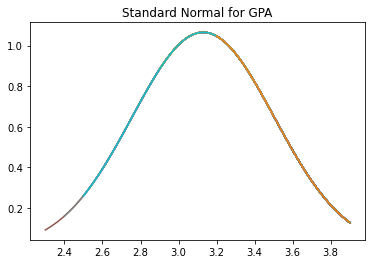

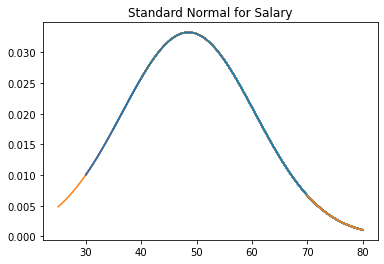

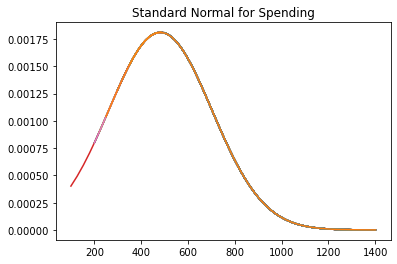

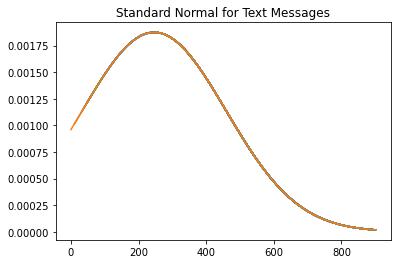

In [26]:
#2.8 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. 
#For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

ContinuosVariable = Survey[["GPA" , "Salary" , "Spending", "Text Messages"]]
ContinuosVariable

Mean = list()
Median = list()
Mode = list()
SD = list()
for name in ContinuosVariable.columns:
    Mean.append(stat.mean(ContinuosVariable[name]))
    Median.append(stat.median(ContinuosVariable[name]))
    Mode.append(stat.mode(ContinuosVariable[name]))
    SD.append(np.std(ContinuosVariable[name]))

Data = {"Variable" : ContinuosVariable.columns , "Mean" : Mean , "Median" : Median , "Mode" : Mode , "Standard Deviation" : SD}
DataForNorm = pd.DataFrame(Data)

LinSpace = list()

Data_2 = list()
for name in ContinuosVariable.columns:
    LinSpace.append(np.linspace(ContinuosVariable[name] , stop=max(ContinuosVariable[name])))

for i in range(0 , len(LinSpace)):
    plt.plot(LinSpace[i],scipy.stats.norm.pdf(LinSpace[i] ,DataForNorm.iloc[i]["Mean"],DataForNorm.iloc[i]["Standard Deviation"]))
    plt.title("Standard Normal for "+  DataForNorm.iloc[i]["Variable"])
    plt.show()



In [32]:
##########################################Shingles############################################################
#Read the .csv file 
Shingles = pd.read_csv("C:/Users/Vidhut Sharma/Documents/PRojectsGivenByGL/A+&+B+shingles.csv")
Shingles.T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
A,0.44,0.61,0.47,0.30,0.15,0.24,0.16,0.20,0.20,0.20,...,0.49,0.34,0.36,0.29,0.27,0.4,0.29,0.43,0.34,0.37
B,0.14,0.15,0.31,0.16,0.37,0.18,0.42,0.58,0.25,0.41,...,0.16,0.52,0.36,0.22,0.39,NaN,NaN,NaN,NaN,NaN


In [48]:
#3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits?
#State your conclusions clearly showing all steps.

##t_statistics and pvalue for Shingles A
#As we have divided the pvalue by 2 due to the fact that it is a one tail test and by default when we calculate ttest in 
#python it gives the pvalue for 2 sided
t_statistics , pvalue = scipy.stats.ttest_1samp(Shingles["A"],0.35,nan_policy="omit")
print(pvalue/2,t_statistics)

0.07477633144907513 -1.4735046253382782


In [50]:
#t_statistics and pvalue for Shingles B
t_statistics , pvalue = scipy.stats.ttest_1samp(Shingles["B"],0.35,nan_policy="omit")
print(pvalue/2,t_statistics)

0.0020904774003191826 -3.1003313069986995


In [52]:
#3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the 
#hypothesis. What assumption do you need to check before the test for equality of means is performed?

t_statistics , pvalue = scipy.stats.ttest_ind(Shingles["A"] , Shingles["B"],nan_policy="omit")
print(pvalue,t_statistics)

0.2017496571835306 1.2896282719661123
